In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/test.csv
/kaggle/input/house-prices-advanced-regression-techniques/train.csv


In [2]:
data = pd.read_csv("../input/house-prices-advanced-regression-techniques/train.csv")

In [3]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
data.shape

(1460, 81)

In [5]:
def get_sum_num(col,data):
    dtype="Numeric"
    count=data[col].shape[0]
    missing=data[col].isnull().sum()
    unique=len(data[col].unique())
    zeros=data[data[col]==0].shape[0]
    small=data[col].min()
    d1=data[col].quantile(0.1)
    d2=data[col].quantile(0.2)
    d3=data[col].quantile(0.3)
    d4=data[col].quantile(0.4)
    d5=data[col].quantile(0.5)
    d6=data[col].quantile(0.6)
    d7=data[col].quantile(0.7)
    d8=data[col].quantile(0.8)
    d9=data[col].quantile(0.9)
    large=data[col].max()
    return col,dtype,count,missing,unique,zeros,small,d1,d2,d3,d4,d5,d6,d7,d8,d9,large
def get_sum_cat(col,data):
    dtype="Character"
    count=data[col].shape[0]
    missing=data[col].isnull().sum()
    unique=len(data[col].unique())
    zeros="NA"
    small="NA"
    d1="NA"
    d2="NA"
    d3="NA"
    d4="NA"
    d5="NA"
    d6="NA"
    d7="NA"
    d8="NA"
    d9="NA"
    large="NA"
    return col,dtype,count,missing,unique,zeros,small,d1,d2,d3,d4,d5,d6,d7,d8,d9,large

In [6]:
def get_report(data):
    cols_num=data.dtypes[data.dtypes!="object"].index
    cols_cat=data.dtypes[data.dtypes=="object"].index
    res_num=[]
    for col in cols_num:
        res_num.append(get_sum_num(col,data))
    res_cat=[]
    for col in cols_cat:
        res_cat.append(get_sum_cat(col,data))
    cat=pd.DataFrame(res_cat)
    num=pd.DataFrame(res_num)
    result=pd.concat([num,cat],axis=0)
    result.columns=['col','dtype','count','missing','unique','zeros','min','d1','d2','d3','d4','d5','d6','d7','d8','d9','max']
    result=result.reset_index().drop("index",axis=1)
    return result

In [7]:
a=pd.DataFrame(get_report(data))
a.head()

,col,dtype,count,missing,unique,zeros,min,d1,d2,d3,d4,d5,d6,d7,d8,d9,max
0,Id,Numeric,1460,0,1460,0,1,146.9,292.8,438.7,584.6,730.5,876.4,1022.3,1168.2,1314.1,1460
1,MSSubClass,Numeric,1460,0,15,0,20,20,20,20,30,50,60,60,80,120,190
2,LotFrontage,Numeric,1460,259,111,0,21,44,53,60,63,69,74,79,85,96,313
3,LotArea,Numeric,1460,0,1073,0,1300,5000,7078.4,8063.7,8793.4,9478.5,10198.2,11066.5,12205.8,14381.7,215245
4,OverallQual,Numeric,1460,0,10,0,1,5,5,5,6,6,6,7,7,8,10


In [8]:
a.loc[(a.dtype=="Numeric")]

,col,dtype,count,missing,unique,zeros,min,d1,d2,d3,d4,d5,d6,d7,d8,d9,max
0,Id,Numeric,1460,0,1460,0,1,146.9,292.8,438.7,584.6,730.5,876.4,1022.3,1168.2,1314.1,1460
1,MSSubClass,Numeric,1460,0,15,0,20,20,20,20,30,50,60,60,80,120,190
2,LotFrontage,Numeric,1460,259,111,0,21,44,53,60,63,69,74,79,85,96,313
3,LotArea,Numeric,1460,0,1073,0,1300,5000,7078.4,8063.7,8793.4,9478.5,10198.2,11066.5,12205.8,14381.7,215245
4,OverallQual,Numeric,1460,0,10,0,1,5,5,5,6,6,6,7,7,8,10
5,OverallCond,Numeric,1460,0,9,0,1,5,5,5,5,5,5,6,7,7,9
6,YearBuilt,Numeric,1460,0,112,0,1872,1924.9,1947.8,1958,1965,1973,1984,1997.3,2003,2006,2010
7,YearRemodAdd,Numeric,1460,0,61,0,1950,1950,1961.8,1971,1980,1994,1998,2002,2005,2006,2010
8,MasVnrArea,Numeric,1460,8,328,861,0,0,0,0,0,0,16,117,206,335,1600
9,BsmtFinSF1,Numeric,1460,0,637,467,0,0,0,0,218.6,383.5,525.6,655,806.4,1065.5,5644


In [9]:
data.isna().any()[lambda x: x]

LotFrontage     True
Alley           True
MasVnrType      True
MasVnrArea      True
BsmtQual        True
BsmtCond        True
BsmtExposure    True
BsmtFinType1    True
BsmtFinType2    True
Electrical      True
FireplaceQu     True
GarageType      True
GarageYrBlt     True
GarageFinish    True
GarageQual      True
GarageCond      True
PoolQC          True
Fence           True
MiscFeature     True
dtype: bool

In [10]:
avg =data['LotFrontage'].mean()
print(avg)
data.loc[(pd.isnull(data.LotFrontage)), 'LotFrontage'] = avg

70.04995836802665


In [11]:
avg =data['MasVnrArea'].mean()
print(avg)
data.loc[(pd.isnull(data.MasVnrArea)), 'MasVnrArea'] = avg

103.68526170798899


In [12]:
avg =data['GarageYrBlt'].mean()
print(avg)
data.loc[(pd.isnull(data.GarageYrBlt)), 'GarageYrBlt'] = avg

1978.5061638868744


In [13]:
a=pd.DataFrame(get_report(data))
a.loc[(a.dtype=="Numeric")]

,col,dtype,count,missing,unique,zeros,min,d1,d2,d3,d4,d5,d6,d7,d8,d9,max
0,Id,Numeric,1460,0,1460,0,1,146.9,292.8,438.7,584.6,730.5,876.4,1022.3,1168.2,1314.1,1460
1,MSSubClass,Numeric,1460,0,15,0,20,20,20,20,30,50,60,60,80,120,190
2,LotFrontage,Numeric,1460,0,111,0,21,49,59,60,68,70.05,70.05,75,80,92,313
3,LotArea,Numeric,1460,0,1073,0,1300,5000,7078.4,8063.7,8793.4,9478.5,10198.2,11066.5,12205.8,14381.7,215245
4,OverallQual,Numeric,1460,0,10,0,1,5,5,5,6,6,6,7,7,8,10
5,OverallCond,Numeric,1460,0,9,0,1,5,5,5,5,5,5,6,7,7,9
6,YearBuilt,Numeric,1460,0,112,0,1872,1924.9,1947.8,1958,1965,1973,1984,1997.3,2003,2006,2010
7,YearRemodAdd,Numeric,1460,0,61,0,1950,1950,1961.8,1971,1980,1994,1998,2002,2005,2006,2010
8,MasVnrArea,Numeric,1460,0,328,861,0,0,0,0,0,0,25.2,116,205.2,335,1600
9,BsmtFinSF1,Numeric,1460,0,637,467,0,0,0,0,218.6,383.5,525.6,655,806.4,1065.5,5644


In [14]:
a.loc[(a.dtype=="Character")]

,col,dtype,count,missing,unique,zeros,min,d1,d2,d3,d4,d5,d6,d7,d8,d9,max
38,MSZoning,Character,1460,0,5,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
39,Street,Character,1460,0,2,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
40,Alley,Character,1460,1369,3,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
41,LotShape,Character,1460,0,4,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
42,LandContour,Character,1460,0,4,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
43,Utilities,Character,1460,0,2,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
44,LotConfig,Character,1460,0,5,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
45,LandSlope,Character,1460,0,3,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
46,Neighborhood,Character,1460,0,25,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
47,Condition1,Character,1460,0,9,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [15]:
data['Alley'].value_counts(dropna = False)

NaN     1369
Grvl      50
Pave      41
Name: Alley, dtype: int64

In [16]:
data.loc[(pd.isnull(data["Alley"]), 'Alley')] = "No Spec"
data['Alley'].value_counts(dropna = False)

No Spec    1369
Grvl         50
Pave         41
Name: Alley, dtype: int64

In [17]:
data['MasVnrType'].value_counts(dropna = False)

None       864
BrkFace    445
Stone      128
BrkCmn      15
NaN          8
Name: MasVnrType, dtype: int64

In [18]:
data.loc[(pd.isnull(data["MasVnrType"]), 'MasVnrType')] = "None"
data['MasVnrType'].value_counts(dropna = False)

None       872
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [19]:
data['BsmtQual'].value_counts(dropna = False)

TA     649
Gd     618
Ex     121
NaN     37
Fa      35
Name: BsmtQual, dtype: int64

In [20]:
data.fillna(value="None", inplace=True)

In [21]:
a=pd.DataFrame(get_report(data))
a.loc[(a.dtype=="Character")]

,col,dtype,count,missing,unique,zeros,min,d1,d2,d3,d4,d5,d6,d7,d8,d9,max
38,MSZoning,Character,1460,0,5,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
39,Street,Character,1460,0,2,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
40,Alley,Character,1460,0,3,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
41,LotShape,Character,1460,0,4,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
42,LandContour,Character,1460,0,4,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
43,Utilities,Character,1460,0,2,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
44,LotConfig,Character,1460,0,5,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
45,LandSlope,Character,1460,0,3,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
46,Neighborhood,Character,1460,0,25,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
47,Condition1,Character,1460,0,9,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


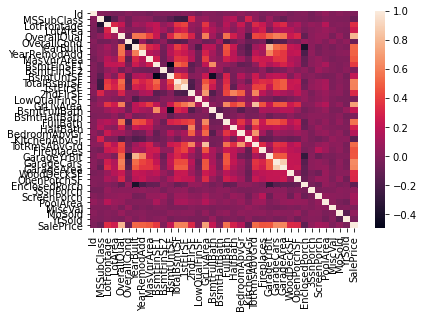

In [22]:
import seaborn as sns
corr = data.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [23]:
y=data["SalePrice"]
print(type(y))
y=pd.DataFrame(y)
print(type(y))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


In [24]:
X=data.drop(['SalePrice'],axis=1)
X.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,No Spec,Reg,Lvl,AllPub,...,0,0,None,None,None,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,No Spec,Reg,Lvl,AllPub,...,0,0,None,None,None,0,5,2007,WD,Normal


In [25]:
datas = pd.read_csv("../input/house-prices-advanced-regression-techniques/test.csv")

In [26]:
datas.shape

(1459, 80)

In [27]:
b=pd.DataFrame(get_report(datas))
b.loc[(a.dtype=="Numeric")]

,col,dtype,count,missing,unique,zeros,min,d1,d2,d3,d4,d5,d6,d7,d8,d9,max
0,Id,Numeric,1459,0,1459,0,1461,1606.8,1752.6,1898.4,2044.2,2190,2335.8,2481.6,2627.4,2773.2,2919
1,MSSubClass,Numeric,1459,0,16,0,20,20,20,20,30,50,60,60,80,120,190
2,LotFrontage,Numeric,1459,227,116,0,21,43,52,60,62.4,67,72,78,83,94,200
3,LotArea,Numeric,1459,0,1106,0,1470,4793,6958.4,7843.8,8640,9399,10125.8,10940.2,12194.4,14259,56600
4,OverallQual,Numeric,1459,0,10,0,1,5,5,5,6,6,6,7,7,8,10
5,OverallCond,Numeric,1459,0,9,0,1,5,5,5,5,5,5,6,6,7,9
6,YearBuilt,Numeric,1459,0,106,0,1879,1924,1947,1957,1965,1973,1985,1998,2003,2006,2010
7,YearRemodAdd,Numeric,1459,0,61,0,1950,1950,1958,1968,1977,1992,1998,2002,2005,2007,2010
8,MasVnrArea,Numeric,1459,15,304,877,0,0,0,0,0,0,0,122,200,310,1290
9,BsmtFinSF1,Numeric,1459,1,670,462,0,0,0,0,189,350.5,504,658.9,819.6,1039.8,4010


In [28]:
b.loc[(a.dtype=="Character")]

,col,dtype,count,missing,unique,zeros,min,d1,d2,d3,d4,d5,d6,d7,d8,d9,max
38,Street,Character,1459,0,2,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
39,Alley,Character,1459,1352,3,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
40,LotShape,Character,1459,0,4,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
41,LandContour,Character,1459,0,4,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
42,Utilities,Character,1459,2,2,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
43,LotConfig,Character,1459,0,5,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
44,LandSlope,Character,1459,0,3,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
45,Neighborhood,Character,1459,0,25,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
46,Condition1,Character,1459,0,9,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
47,Condition2,Character,1459,0,5,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [29]:
avg =datas['LotFrontage'].mean()
print(avg)
datas.loc[(pd.isnull(datas.LotFrontage)), 'LotFrontage'] = avg

68.58035714285714


In [30]:
avg =datas['MasVnrArea'].mean()
print(avg)
datas.loc[(pd.isnull(datas.MasVnrArea)), 'MasVnrArea'] = avg

100.70914127423822


In [31]:
avg =datas['BsmtFinSF1'].mean()
print(avg)
datas.loc[(pd.isnull(datas.BsmtFinSF1)), 'BsmtFinSF1'] = avg

439.2037037037037


In [32]:
avg =datas['BsmtFinSF2'].mean()
print(avg)
datas.loc[(pd.isnull(datas.BsmtFinSF2)), 'BsmtFinSF2'] = avg

52.61934156378601


In [33]:
avg =datas['BsmtUnfSF'].mean()
print(avg)
datas.loc[(pd.isnull(datas.BsmtUnfSF)), 'BsmtUnfSF'] = avg

554.2949245541838


In [34]:
avg =datas['TotalBsmtSF'].mean()
print(avg)
datas.loc[(pd.isnull(datas.TotalBsmtSF)), 'TotalBsmtSF'] = avg

1046.1179698216736


In [35]:
avg =datas['BsmtFullBath'].mean()
print(avg)
datas.loc[(pd.isnull(datas.BsmtFullBath)), 'BsmtFullBath'] = avg

0.4344543582704187


In [36]:
avg =datas['BsmtHalfBath'].mean()
print(avg)
datas.loc[(pd.isnull(datas.BsmtHalfBath)), 'BsmtHalfBath'] = avg

0.06520247083047358


In [37]:
avg =datas['GarageYrBlt'].mean()
print(avg)
datas.loc[(pd.isnull(datas.GarageYrBlt)), 'GarageYrBlt'] = avg

1977.7212165097756


In [38]:
avg =datas['GarageCars'].mean()
print(avg)
datas.loc[(pd.isnull(datas.GarageCars)), 'GarageCars'] = avg

1.7661179698216736


In [39]:
avg =datas['GarageArea'].mean()
print(avg)
datas.loc[(pd.isnull(datas.GarageArea)), 'GarageArea'] = avg

472.76886145404666


In [40]:
b=pd.DataFrame(get_report(datas))
b.loc[(a.dtype=="Numeric")]

,col,dtype,count,missing,unique,zeros,min,d1,d2,d3,d4,d5,d6,d7,d8,d9,max
0,Id,Numeric,1459,0,1459,0,1461,1606.8,1752.6,1898.4,2044.2,2190,2335.8,2481.6,2627.4,2773.2,2919
1,MSSubClass,Numeric,1459,0,16,0,20,20,20,20,30,50,60,60,80,120,190
2,LotFrontage,Numeric,1459,0,116,0,21,45,57,60,65,68.5804,69,75,80,91,200
3,LotArea,Numeric,1459,0,1106,0,1470,4793,6958.4,7843.8,8640,9399,10125.8,10940.2,12194.4,14259,56600
4,OverallQual,Numeric,1459,0,10,0,1,5,5,5,6,6,6,7,7,8,10
5,OverallCond,Numeric,1459,0,9,0,1,5,5,5,5,5,5,6,6,7,9
6,YearBuilt,Numeric,1459,0,106,0,1879,1924,1947,1957,1965,1973,1985,1998,2003,2006,2010
7,YearRemodAdd,Numeric,1459,0,61,0,1950,1950,1958,1968,1977,1992,1998,2002,2005,2007,2010
8,MasVnrArea,Numeric,1459,0,304,877,0,0,0,0,0,0,0,120,198,309.2,1290
9,BsmtFinSF1,Numeric,1459,0,670,462,0,0,0,0,189.2,351,503.8,658.6,819.4,1039.2,4010


In [41]:
datas.loc[(pd.isnull(datas["Alley"]), 'Alley')] = "No Spec"
datas['Alley'].value_counts(dropna = False)

No Spec    1352
Grvl         70
Pave         37
Name: Alley, dtype: int64

In [42]:
datas.fillna(value="None", inplace=True)

In [43]:
b=pd.DataFrame(get_report(datas))
b.loc[(a.dtype=="Numeric")]

,col,dtype,count,missing,unique,zeros,min,d1,d2,d3,d4,d5,d6,d7,d8,d9,max
0,Id,Numeric,1459,0,1459,0,1461,1606.8,1752.6,1898.4,2044.2,2190,2335.8,2481.6,2627.4,2773.2,2919
1,MSSubClass,Numeric,1459,0,16,0,20,20,20,20,30,50,60,60,80,120,190
2,LotFrontage,Numeric,1459,0,116,0,21,45,57,60,65,68.5804,69,75,80,91,200
3,LotArea,Numeric,1459,0,1106,0,1470,4793,6958.4,7843.8,8640,9399,10125.8,10940.2,12194.4,14259,56600
4,OverallQual,Numeric,1459,0,10,0,1,5,5,5,6,6,6,7,7,8,10
5,OverallCond,Numeric,1459,0,9,0,1,5,5,5,5,5,5,6,6,7,9
6,YearBuilt,Numeric,1459,0,106,0,1879,1924,1947,1957,1965,1973,1985,1998,2003,2006,2010
7,YearRemodAdd,Numeric,1459,0,61,0,1950,1950,1958,1968,1977,1992,1998,2002,2005,2007,2010
8,MasVnrArea,Numeric,1459,0,304,877,0,0,0,0,0,0,0,120,198,309.2,1290
9,BsmtFinSF1,Numeric,1459,0,670,462,0,0,0,0,189.2,351,503.8,658.6,819.4,1039.2,4010


In [44]:
b.loc[(a.dtype=="Character")]

,col,dtype,count,missing,unique,zeros,min,d1,d2,d3,d4,d5,d6,d7,d8,d9,max
38,Street,Character,1459,0,2,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
39,Alley,Character,1459,0,3,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
40,LotShape,Character,1459,0,4,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
41,LandContour,Character,1459,0,4,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
42,Utilities,Character,1459,0,2,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
43,LotConfig,Character,1459,0,5,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
44,LandSlope,Character,1459,0,3,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
45,Neighborhood,Character,1459,0,25,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
46,Condition1,Character,1459,0,9,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
47,Condition2,Character,1459,0,5,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [45]:
datas.shape

(1459, 80)

In [46]:
X=pd.get_dummies(X)
X.shape

(1460, 304)

In [47]:
X2=pd.get_dummies(datas)
X2.shape

(1459, 292)

In [48]:
final_train, final_test = X.align(X2,join='left',axis=1,fill_value=0)

In [49]:
print(final_train.shape)
print(final_test.shape)

(1460, 304)
(1459, 304)


In [50]:
from tpot import TPOTRegressor
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_train,y, test_size=0.5, random_state=200)

In [51]:
tpot = TPOTRegressor(generations=3, population_size=50, verbosity=2, random_state=200)
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))
tpot.export('tpot_houseprice_pipeline.py')

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Generation 1 - Current best internal CV score: -1058636913.5296946
Generation 2 - Current best internal CV score: -1003609854.4375414
Generation 3 - Current best internal CV score: -949976415.3268503

Best pipeline: RandomForestRegressor(LassoLarsCV(input_matrix, normalize=True), bootstrap=False, max_features=0.25, min_samples_leaf=11, min_samples_split=2, n_estimators=100)
-762481136.949629


/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [52]:
# Generate the predictions
submission = tpot.predict(final_test)

In [53]:
# Create the submission file
final = pd.DataFrame({'Id': final_test['Id'], 'SalePrice': submission})
final.to_csv('submission.csv', index = False)

In [54]:
final.shape

(1459, 2)